In [21]:
%pip install numpy pandas seaborn matplotlib sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [22]:
import numpy as ny
import pandas as pd

In [23]:
data = pd.read_excel("../data/raw/data_raw.xlsx")

In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
data.columns

Index(['Кампания', 'Вид', 'ID', 'Комментарии', 'Эмоциональная окраска'], dtype='object')

In [26]:
[f"{col} - {type(col)}" for col in data.columns]

["Кампания - <class 'str'>",
 "Вид - <class 'str'>",
 "ID - <class 'str'>",
 "Комментарии - <class 'str'>",
 "Эмоциональная окраска - <class 'str'>"]

In [27]:
data.head(20)

,Кампания,Вид,ID,Комментарии,Эмоциональная окраска
0,7764,CSAT,58579527,Уже регестрировалась,Нейтральная
1,7764,CSAT,58588258,Вам зачем местоположение?,Нейтральная
2,7764,CSAT,58603829,Видео нет,Негативная
3,7764,CSAT,58621041,конченые.,Негативная
4,7764,CSAT,58623722,зачем мне это?,Нейтральная
5,7764,CSAT,58629373,упростить,Негативная
6,7764,CSAT,58630907,полная лажа,Негативная
7,7764,CSAT,58676534,"Запрос, на обработку моих персональных данных,...",Негативная
8,7764,CSAT,58676824,Нихера не показывает,Негативная
9,7764,CSAT,58677527,Код быстро удаляют,Негативная


In [28]:
new_data = data.drop(["Вид", "ID", "Кампания"], axis = 1)
new_data = new_data.dropna()

In [29]:
new_data.head(10)

,Комментарии,Эмоциональная окраска
0,Уже регестрировалась,Нейтральная
1,Вам зачем местоположение?,Нейтральная
2,Видео нет,Негативная
3,конченые.,Негативная
4,зачем мне это?,Нейтральная
5,упростить,Негативная
6,полная лажа,Негативная
7,"Запрос, на обработку моих персональных данных,...",Негативная
8,Нихера не показывает,Негативная
9,Код быстро удаляют,Негативная


In [30]:
new_data["Эмоциональная окраска"].unique()

array(['Нейтральная', 'Негативная', 'Мусор', 'Позитивная'], dtype=object)

In [31]:
new_data = new_data.rename(columns={
    "Комментарии": "text",
    "Эмоциональная окраска": "type",
})

In [32]:
data = new_data['type'] = new_data['type'].map({
    'Мусор': 0,
    'Негативная': 1,
    'Нейтральная': 2,
    'Позитивная': 3,
    })

In [33]:
new_data.head(10)

,text,type
0,Уже регестрировалась,2
1,Вам зачем местоположение?,2
2,Видео нет,1
3,конченые.,1
4,зачем мне это?,2
5,упростить,1
6,полная лажа,1
7,"Запрос, на обработку моих персональных данных,...",1
8,Нихера не показывает,1
9,Код быстро удаляют,1


In [34]:
from string import punctuation
tbl = str.maketrans("", "", punctuation)

s = new_data['text'].str.lower()
s = s.str.translate(tbl)
s = s.str.replace(r'\s+', ' ', regex=True)
s = s.str.strip()

new_data['label'] = s

In [35]:
new_data

,text,type,label
0,Уже регестрировалась,2,уже регестрировалась
1,Вам зачем местоположение?,2,вам зачем местоположение
2,Видео нет,1,видео нет
3,конченые.,1,конченые
4,зачем мне это?,2,зачем мне это
...,...,...,...
16621,Добавить возможность удаления комментариев и б...,1,добавить возможность удаления комментариев и б...
16622,Всё,0,всё
16623,все четко,3,все четко
16624,все ок\n,2,все ок


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data_count = new_data.groupby("type")["label"].count()
df_count = data_count.to_frame()
df_count

,label
type,
0,4587
1,5018
2,2278
3,4742


C:\Users\FIVEL\AppData\Local\Temp\ipykernel_18284\2015473208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_count.index, y = df_count['label'], palette = 'summer')
C:\Users\FIVEL\AppData\Local\Temp\ipykernel_18284\2015473208.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


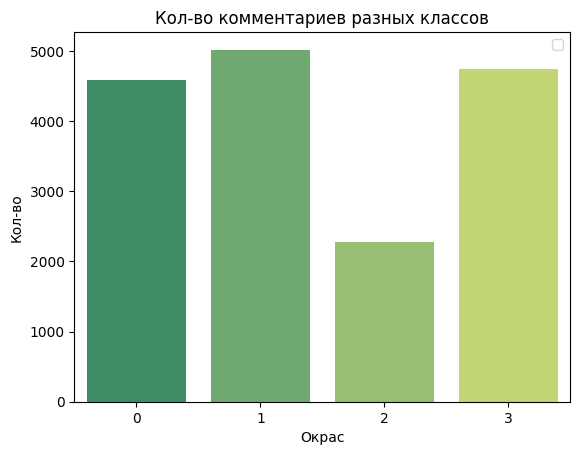

In [38]:
sns.barplot(x=df_count.index, y = df_count['label'], palette = 'summer')

plt.title("Кол-во комментариев разных классов")
plt.xlabel("Окрас")
plt.ylabel("Кол-во")
plt.legend()
plt.savefig("analyze.svg")

In [39]:
from sklearn.model_selection import train_test_split

X = new_data["text"]
y = new_data["type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9, stratify=y, shuffle=True
)

pd.concat([X_train, y_train], axis=1).to_csv("../data/output/train.csv")
pd.concat([X_test, y_test], axis=1).to_csv("../data/output/test.csv")